### Unicorn Company in the World

###### An analysis into Unicorn companies, total funding received, city of incorporation, current valuation and some selected investors.

In [2]:
# import the neccesary libraries ....

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

###### Used Excel to check through the data, calculate through the years to become a Unicorn and calculate the ROI.
###### All figures are in billion dollars, except ROI which is multiples

In [3]:
working_directory = os.getcwd()
path = working_directory + '/Unicorn_Companies.csv'
df = pd.read_csv(path)
df.head(2)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year to be a unicorn,Return on investment
0,Bytedance,180,07/04/2017,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23
1,SpaceX,100,01/12/2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1074 non-null   object
 1   Valuation             1074 non-null   int64 
 2   Date Joined           1074 non-null   object
 3   Industry              1074 non-null   object
 4   City                  1058 non-null   object
 5   Country               1074 non-null   object
 6   Continent             1074 non-null   object
 7   Year Founded          1074 non-null   int64 
 8   Funding               1074 non-null   int64 
 9   Select Investors      1073 non-null   object
 10  Year to be a unicorn  1074 non-null   int64 
 11  Return on investment  1074 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 100.8+ KB


In [5]:
df.shape

(1074, 12)

In [6]:
df.mean()

C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Valuation                  3.455307
Year Founded            2012.895717
Funding                    0.507449
Year to be a unicorn       7.000931
Return on investment       1.667598
dtype: float64

In [110]:
# Total funding received by Unicorns

df.sum()[8]

C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/1613151495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()[8]


1791

In [7]:
# rename the columns for with space using underscore, for easy access

df.columns = df.columns.str.replace(' ', '_')
df.tail(1)

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment
1073,Zwift,1,16/09/2020,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,1,"Novator Partners, True, Causeway Media Partners",6,1


In [8]:
df['Date_Joined'] = pd.to_datetime(df['Date_Joined'])
df.head(2)

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment
0,Bytedance,180,2017-07-04,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23
1,SpaceX,100,2012-01-12,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14


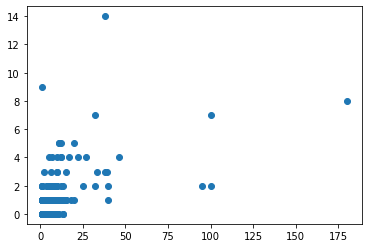

In [9]:
plt.scatter(df.Valuation, df.Funding)
plt.show()

#### Industries and No of Unicorns

In [10]:
list(set(df.Country))
list(set(df.Industry))

['Consumer & retail',
 'Hardware',
 'Other',
 'Artificial Intelligence',
 'Fintech',
 'Auto & transportation',
 'Health',
 'E-commerce & direct-to-consumer',
 'Supply chain, logistics, & delivery',
 'Cybersecurity',
 'Mobile & telecommunications',
 'Edtech',
 'Travel',
 'Data management & analytics',
 'Internet software & services']

In [11]:
# Industry classification of Unicorns

Industy_unicorn = df.groupby('Industry').count()
Industy_unicorn = Industy_unicorn.sort_values(by='Company', ascending=False)
Industy_unicorn.Company

Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Artificial Intelligence                 84
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Company, dtype: int64

Text(0.5, 0, 'No of Unicorns')

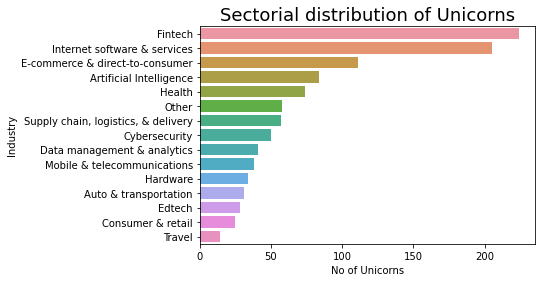

In [12]:
# Graphical illustration

ax = sns.barplot(data = Industy_unicorn, x=Industy_unicorn.Company, y= Industy_unicorn.index, orient='horizontal')
ax.set_title('Sectorial distribution of Unicorns', size=18)
ax.set_xlabel('No of Unicorns')


##### Analyse the industry with the fastest chance to become a Unicorn as well as the associated returns on investment

In [13]:
# calculating the years it takes to becoming a unicorn

Years_unicorn = df.groupby('Industry').mean()
Years_unicorn = Years_unicorn.loc[:]
Years_unicorn= Years_unicorn.sort_values(by='Year_to_be_a_unicorn', ascending=False)
Years_unicorn

,Valuation,Year_Founded,Funding,Year_to_be_a_unicorn,Return_on_investment
Industry,,,,,
Health,2.675676,2011.878378,0.418919,8.189189,1.716216
Consumer & retail,4.240000,2010.320000,1.040000,8.080000,1.840000
Data management & analytics,3.317073,2012.073171,0.317073,8.073171,1.414634
Internet software & services,2.902439,2012.531707,0.287805,7.868293,1.351220
Other,4.344828,2011.844828,0.672414,7.775862,1.189655
Edtech,3.571429,2011.535714,0.750000,7.714286,1.500000
"Supply chain, logistics, & delivery",3.105263,2013.035088,0.754386,6.929825,1.421053
Cybersecurity,2.580000,2013.600000,0.440000,6.800000,1.700000
Travel,3.285714,2012.214286,1.071429,6.571429,2.357143


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

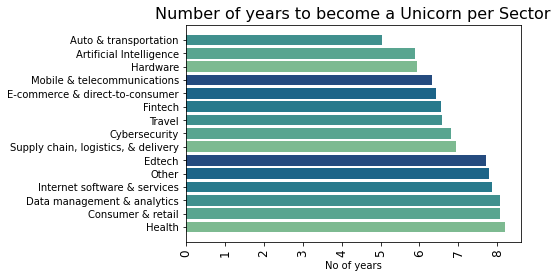

In [14]:
# Graphical illustration
colors = sns.color_palette("crest")

plt.barh(Years_unicorn.index, Years_unicorn.Year_to_be_a_unicorn, color=colors)
plt.title('Number of years to become a Unicorn per Sector', size=16)
plt.xlabel('No of years')
plt.xticks(rotation='vertical', size=12)


##### Investment and returns by sectors

C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/1564072878.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/1564072878.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


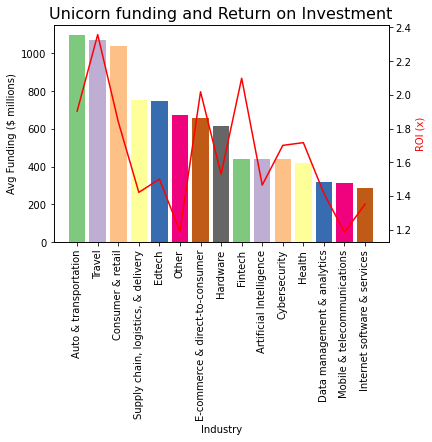

In [16]:
%matplotlib inline 

Years_unicorn1 = Years_unicorn.sort_values(by='Funding', ascending=False)

keys = Years_unicorn1.index
colors = sns.color_palette('Accent')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Years_unicorn1.Funding*1000, color=colors)
ax2.plot(keys, Years_unicorn1.Return_on_investment, color='red')

ax1.set_xlabel('Industry')
ax1.set_ylabel('Avg Funding ($ millions)', color='black')
ax2.set_ylabel('ROI (x)', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Unicorn funding and Return on Investment', size=16)

fig.show()


C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/2558073827.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_760/2558073827.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


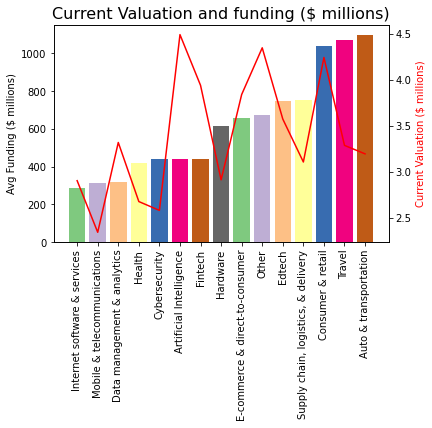

In [17]:
%matplotlib inline 

Years_unicorn1 = Years_unicorn.sort_values(by='Funding', ascending=True)

keys = Years_unicorn1.index
colors = sns.color_palette('Accent')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Years_unicorn1.Funding*1000, color=colors)
ax2.plot(keys, Years_unicorn1.Valuation, color='red')

ax1.set_ylabel('Avg Funding ($ millions)', color='black')
ax2.set_ylabel('Current Valuation ($ millions)', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Current Valuation and funding ($ millions)', size=16)

fig.show()

#### Country Unicorn Analysis

Country analysis will be executed here while visualisations will be explored in Tableau

In [30]:
country_unicorn = df.groupby('Country').count()
country_unicorn = country_unicorn.sort_values(by='Valuation', ascending=False)
country_unicorn = country_unicorn.Company
country_unicorn

Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Australia                 8
Netherlands               6
Mexico                    6
Hong Kong                 6
Sweden                    6
Indonesia                 6
Japan                     5
Ireland                   5
Switzerland               5
Norway                    4
Finland                   4
Spain                     3
United Arab Emirates      3
Turkey                    3
Belgium                   3
Thailand                  2
Chile                     2
South Africa              2
Colombia                  2
Estonia                   2
Denmark                   2
Philippines               2
Austria                   2
Vietnam                   2
Argentina   

In [32]:
country_unicorns = df.groupby('Country').mean()
country_unicorns

,Valuation,Year_Founded,Funding,Year_to_be_a_unicorn,Return_on_investment
Country,,,,,
Argentina,2.000000,2017.000000,1.000000,4.000000,2.000000
Australia,7.000000,2012.750000,0.250000,7.875000,5.750000
Austria,3.500000,2015.500000,1.000000,5.500000,3.500000
Bahamas,32.000000,2018.000000,2.000000,3.000000,16.000000
Belgium,2.666667,2010.333333,0.333333,10.333333,1.666667
Bermuda,2.000000,2006.000000,0.000000,11.000000,0.000000
Brazil,2.312500,2012.062500,0.687500,7.937500,1.562500
Canada,2.578947,2011.105263,0.315789,10.000000,1.368421
Chile,1.500000,2016.500000,0.000000,5.000000,0.000000


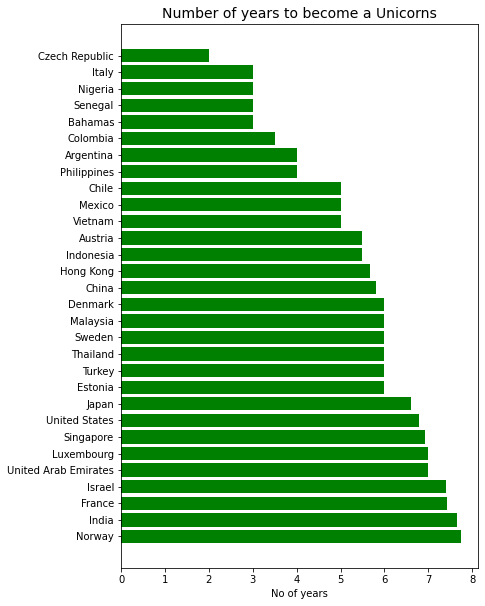

In [71]:
ax = country_unicorns.nsmallest(30, 'Year_to_be_a_unicorn')
ax = ax.sort_values(
                    by='Year_to_be_a_unicorn',
                    ascending=False
)
colors='green'

# bar chart
plt.barh(ax.index, ax.Year_to_be_a_unicorn, color=colors)
plt.title('Number of years to become a Unicorns', size=14)
plt.xlabel('No of years')

#define plot size for all plots
plt.rcParams['figure.figsize'] = [6.4, 8]

plt.show()

In [82]:
# Total Unicorn funding received by country in $'bn

country_funding = df.groupby('Country').sum('Funding')
country_funding.Funding

Country
Argentina                 1
Australia                 2
Austria                   2
Bahamas                   2
Belgium                   1
Bermuda                   0
Brazil                   11
Canada                    6
Chile                     0
China                   106
Colombia                  2
Croatia                   0
Czech Republic            0
Denmark                   0
Estonia                   1
Finland                   1
France                   14
Germany                  17
Hong Kong                 4
India                    47
Indonesia                 6
Ireland                   9
Israel                    4
Italy                     0
Japan                     1
Lithuania                 1
Luxembourg                0
Malaysia                  1
Mexico                    2
Netherlands               2
Nigeria                   1
Norway                    0
Philippines               1
Senegal                   0
Singapore                 6
South Africa

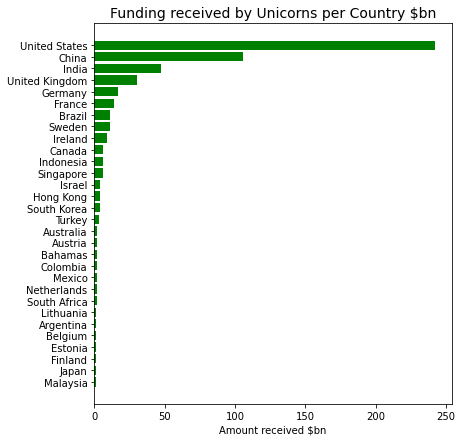

In [99]:
x = country_funding.nlargest(30, 'Funding')

x = x.sort_values(
                    by='Funding',
                    ascending=True
)

colors='green'

# bar chart
plt.barh(x.index, x.Funding, color=colors)
plt.title('Funding received by Unicorns per Country $bn', size=14)
plt.xlabel('Amount received $bn')

#define plot size for all plots
plt.rcParams['figure.figsize'] = [6.4, 7]

plt.show()

In [101]:
# Countries with the best ROI

country_ROI = df.groupby('Country').mean('Return_on_investment')
country_ROI.Return_on_investment

Country
Argentina                2.000000
Australia                5.750000
Austria                  3.500000
Bahamas                 16.000000
Belgium                  1.666667
Bermuda                  0.000000
Brazil                   1.562500
Canada                   1.368421
Chile                    0.000000
China                    1.751445
Colombia                 1.500000
Croatia                  0.000000
Czech Republic           0.000000
Denmark                  0.000000
Estonia                  5.500000
Finland                  1.500000
France                   1.750000
Germany                  2.000000
Hong Kong                1.166667
India                    1.584615
Indonesia                1.166667
Ireland                  0.000000
Israel                   0.650000
Italy                    0.000000
Japan                    0.200000
Lithuania                5.000000
Luxembourg               0.000000
Malaysia                 2.000000
Mexico                   0.833333
Nether

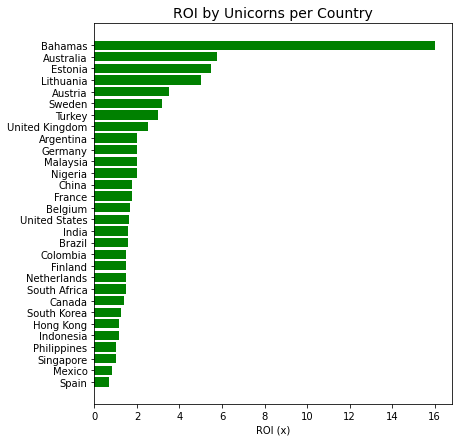

In [105]:
y = country_ROI.nlargest(30, 'Return_on_investment')

y = y.sort_values(
                    by='Return_on_investment',
                    ascending=True
)

colors='green'

# bar chart
plt.barh(y.index, y.Return_on_investment, color=colors)
plt.title('ROI by Unicorns per Country', size=14)
plt.xlabel('ROI (x)')

#define plot size for all plots
plt.rcParams['figure.figsize'] = [6.4, 7.5]

plt.show()

In [126]:
from collections import Counter

In [145]:
investors = list(set(df.Select_Investors))
print(investors)

[nan, 'Salesforce Ventures, next47, Pereg Ventures', 'Khosla Ventures, Horizons Ventures, Temasek Holdings', 'Sequoia Capital India, Tiger Global Management, Matrix Partners India', 'Left Lane Capital, Walden Venture Capital', 'Sequoia Capital China, Warburg Pincus, IDG Capital', 'Tencent Holdings, Tiger Global Management, Global Founders Capital', 'Dark Horse Technology Group, Hopu Investment Management, Kefa Capital', 'Tencent Holdings, CRV, Clocktower Technology Ventures', 'BNP Paribas, Goldman Sachs, Google', 'Sequoia Capital China, Qiming Venture Partners, Tencent Holdings', 'Baidu Capital, Linear Venture, Tencent', 'Thrive Capital, Khosla Ventures, Tiger Global Management', 'KKR, Tencent Holdings, Sequoia Capital China', 'Sequoia Capital China, DST Global, DST Global', 'Goldman Sachs Asset Management', 'Balderton Capital, Next World Capital, Draper Esprit', 'SoftBank Group, Access Industries, Crossbeam Venture Partners', 'Ant Financial Services Group, GGV Capital', 'Northzone Ven